# TP_Clustering

##### Imports

In [4]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from matplotlib import cm
warnings.filterwarnings('ignore')

##### Chargement des données

In [5]:
datas = pd.read_csv('./flickr_data.csv', sep=',', error_bad_lines=False)
X = datas.values
print(datas.head(4))

b'Skipping line 1555: expected 16 fields, saw 17\nSkipping line 3691: expected 16 fields, saw 17\n'


            id           user        lat      long  \
0  22653655033   77161041@N00  45.768121  4.801776   
1  22884818287  113280318@N03  45.759700  4.842200   
2  23277598065  132999708@N08  46.027633  4.699855   
3  22883485267  132999708@N08  46.027572  4.699966   

                                                tags  \
0  square,sierra,squareformat,iphoneography,insta...   
1  square,squareformat,iphoneography,instagramapp...   
2                                                NaN   
3                                                NaN   

                                               title   date_taken_minute  \
0             Enfin. #instabeer #beer #chimay #apero                  46   
1  https://www.facebook.com/PascalFrontiPhotograp...                   3   
2                         compagnons_dev_arnas20 (1)                   0   
3                         compagnons_dev_arnas20 (3)                   1   

    date_taken_hour   date_taken_day   date_taken_month   date_take

b'Skipping line 74107: expected 16 fields, saw 18\nSkipping line 74108: expected 16 fields, saw 18\nSkipping line 75320: expected 16 fields, saw 17\nSkipping line 75323: expected 16 fields, saw 17\nSkipping line 78506: expected 16 fields, saw 17\nSkipping line 78516: expected 16 fields, saw 17\nSkipping line 78517: expected 16 fields, saw 17\nSkipping line 78518: expected 16 fields, saw 17\nSkipping line 78519: expected 16 fields, saw 17\nSkipping line 78520: expected 16 fields, saw 17\nSkipping line 80008: expected 16 fields, saw 17\nSkipping line 81821: expected 16 fields, saw 17\n'


### Prétraitements

In [25]:
print(datas.shape)
datas = datas.drop_duplicates()
print(datas.shape)
datas_numpy = datas.values
tags = datas.tags
X=[]

for index in range(0,len(tags)):
    #print(index)
    try :
        line = str(tags[index]).split(",")
    except KeyError: 
        continue
    else :
        if "lyon" in line:
            X.append(datas_numpy[index])
X = np.array(X)
datas = pd.DataFrame(data=X, columns=datas.columns)
datas.head()

(1582, 16)
(1582, 16)


,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year
0,23243740796,129394312@N07,45.763429,4.849875,"france,architecture,lyon,offices,appartments,i...","InCity, Lyon, France, 2015",11,16,7,9,2015,21,9,24,11,2015
1,22642697483,19710808@N05,45.739289,4.814243,"orange,building,architecture,lyon,edificio,arc...",NaN,29,12,25,6,2015,12,9,24,11,2015
2,22864095577,36030103@N07,45.76768,4.833426,"horses,france,statue,canon,square,lyon,t3i,600...",Lyon 3,45,1,31,10,2015,54,23,23,11,2015
3,22886328439,47009524@N04,45.766411,4.82865,"france,lyon,rhonealpes",20150821-Canon EOS 6D-5405,57,19,21,8,2015,10,21,23,11,2015
4,22625834324,47009524@N04,45.76613,4.830411,"france,lyon,rhonealpes",20150821-Canon EOS 6D-5417,9,20,21,8,2015,10,21,23,11,2015


In [26]:
datas.columns = datas.columns.str.replace(' ','')

In [27]:
BBox = ((datas.long.min(), datas.long.max(), datas.lat.min(), datas.lat.max()))
print(BBox)

(4.617562, 5.075758, 45.584872, 45.90895)


#### La Visualisation

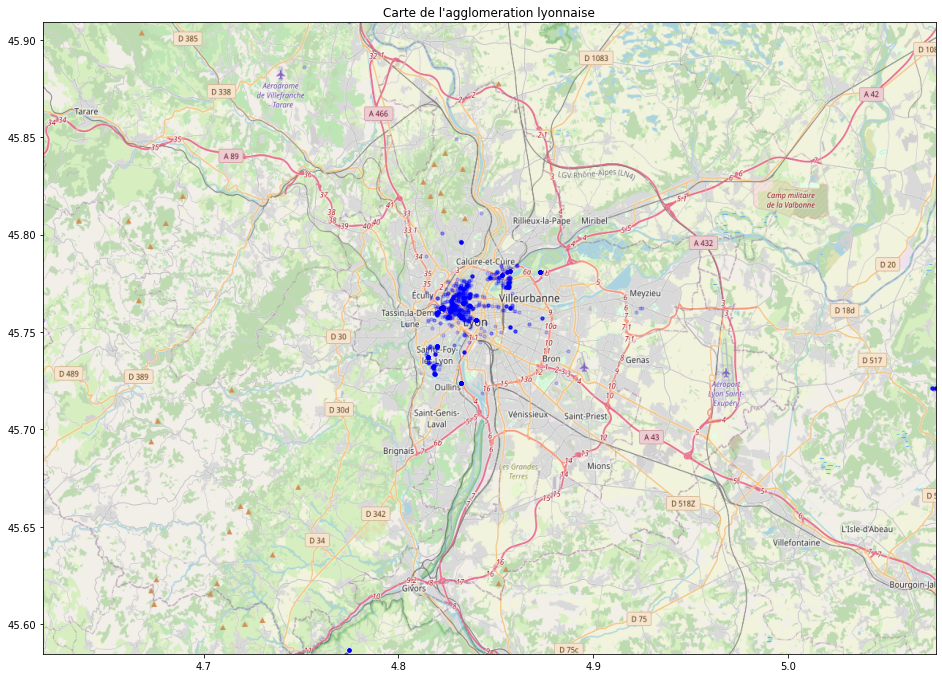

In [28]:
carte = plt.imread('./map.png')
fig, ax = plt.subplots(figsize = (16,14))
ax.scatter(datas.long, datas.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Carte de l\'agglomeration lyonnaise')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(carte, zorder=0, extent = BBox, aspect= 'equal')

#### Le clustering

> On ne peut pas utiliser les K-Means, on ne connait pas le nombre de clusters. On va utiliser un algorithme qui se base sur la densité : DBSCAN.

In [29]:
dbscan = DBSCAN(eps=0.05, min_samples=25)
lat = datas.iloc[:,2:3].values
long = datas.iloc[:,3:4].values
locations = datas.iloc[:,2:4].values
#print(locations.shape)
clustering = dbscan.fit(locations)
#print(clustering.labels_)

#### Visualisation du clustering

In [30]:
#print(long.shape)
#print(lat.shape)
#print(clustering.labels_.shape)

ResultDict = {}
ResultDictLong = {}
ResultDictLat = {}
for index in range(0,len(clustering.labels_)):
    if not clustering.labels_[index] in ResultDict:
        ResultDict[clustering.labels_[index]] = []
        ResultDictLong[clustering.labels_[index]] = []
        ResultDictLat[clustering.labels_[index]] = []
    ResultDict[clustering.labels_[index]].append(np.array([long[index][0],lat[index][0]]))
    ResultDictLong[clustering.labels_[index]].append(long[index][0])
    ResultDictLat[clustering.labels_[index]].append(lat[index][0])
#print(ResultDictLat[0])
#print(ResultDict.keys())
#print(ResultDictLong.keys())
#print(ResultDictLat.keys())
#print(ResultDict)

In [31]:
colors = cm.rainbow(np.linspace(0, 1, len(ResultDict.keys())))

colorsDict = {}
index = 0
for key in ResultDict:
    colorsDict[key] = colors[index]
    index +=1

#print(colors)
#print(colorsDict)

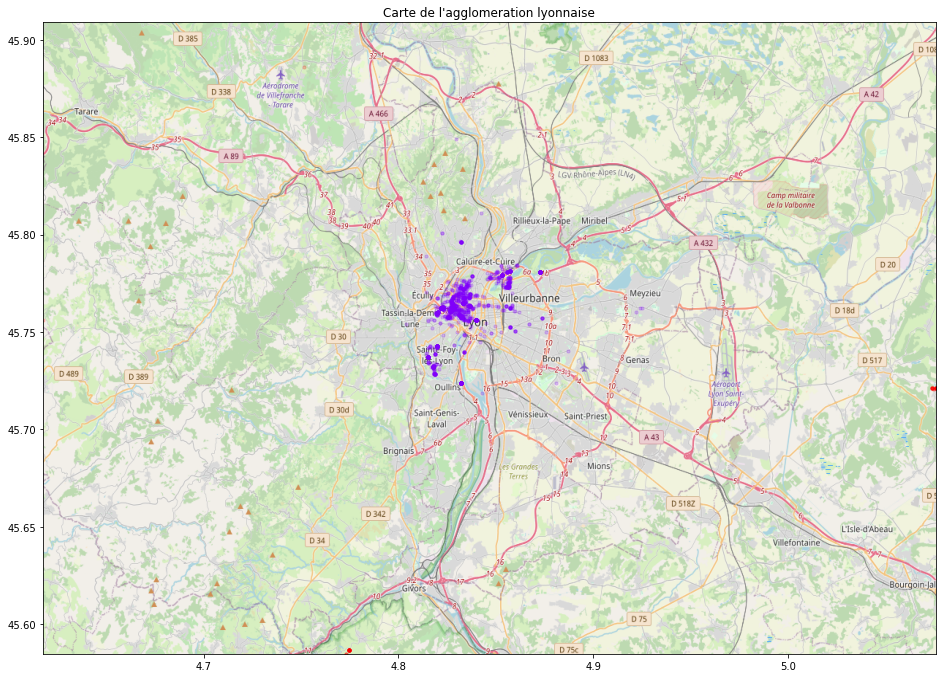

In [32]:

carte = plt.imread('./map.png')
fig, ax = plt.subplots(figsize = (16,14))
for key in ResultDict:
    ax.scatter(ResultDictLong[key], ResultDictLat[key], zorder=1, alpha= 0.2, color=colorsDict[key], s=10)
ax.set_title('Carte de l\'agglomeration lyonnaise')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(carte, zorder=0, extent = BBox, aspect= 'equal')

### TESTING PYSUBGROUP

In [33]:
import pysubgroup as ps

In [34]:
class StrContainsSelector:
    def __init__(self, column, substr):
        self.column = column
        self.substr = substr

    def covers(self, df):
        return df[self.column].str.contains(self.substr).to_numpy()

contains_selector = StrContainsSelector('tags','Lyon')

In [35]:
data = datas

target = ps.BinaryTarget()
searchspace = ps.create_selectors(data, ignore=['date_upload_hour'])
task = ps.SubgroupDiscoveryTask (
    data, 
    target, 
    searchspace, 
    result_set_size=5, 
    depth=2, 
    qf=ps.WRAccQF())
result = ps.BeamSearch().execute(task)

BaseException: No target selector given

In [36]:
print(result.to_dataframe())

   quality subgroup  size_sg  size_dataset  positives_sg  positives_dataset  \
0      0.0  Dataset   1756.0        1756.0           0.0                0.0   

   size_complement  relative_size_sg  relative_size_complement  coverage_sg  \
0              0.0               1.0                       0.0          NaN   

   coverage_complement  target_share_sg  target_share_complement  \
0                  NaN              0.0                      NaN   

   target_share_dataset  lift  
0                   0.0   NaN  


In [13]:
data.head()

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year
0,23243740796,129394312@N07,45.763429,4.849875,"france,architecture,lyon,offices,appartments,i...","InCity, Lyon, France, 2015",11,16,7,9,2015,21,9,24,11,2015
1,22642697483,19710808@N05,45.739289,4.814243,"orange,building,architecture,lyon,edificio,arc...",NaN,29,12,25,6,2015,12,9,24,11,2015
2,22864095577,36030103@N07,45.76768,4.833426,"horses,france,statue,canon,square,lyon,t3i,600...",Lyon 3,45,1,31,10,2015,54,23,23,11,2015
3,22886328439,47009524@N04,45.766411,4.82865,"france,lyon,rhonealpes",20150821-Canon EOS 6D-5405,57,19,21,8,2015,10,21,23,11,2015
4,22625834324,47009524@N04,45.76613,4.830411,"france,lyon,rhonealpes",20150821-Canon EOS 6D-5417,9,20,21,8,2015,10,21,23,11,2015


TEST MLXTEND

Coordinate Little Map

long: 4.7821  - 4.8929
lat : 45.7855  - 45.7261
